<a href="https://colab.research.google.com/github/nelmalfernando/Nelmal_INSE_6220_Project/blob/main/INSE_6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!!pip install pycaret==2.3.5

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting pycaret==2.3.5',
 '  Downloading pycaret-2.3.5-py3-none-any.whl (288 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/288.6 KB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b288.6/288.6 KB\x1b \x1b22.2 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hCollecting spacy<2.4.0',
 '  Using cached spacy-2.3.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)',
 'Requirement already satisfied: pyLDAvis in /usr/local/lib/python3.9/dist-packages (from pycaret==2.3.5) (3.3.1)',
 'Requirement already satisfied: nltk in /usr/local/lib/python3.9/dist-packages (from pycaret==2.3.5) (3.8.1)',
 'Requirement already satisfied: scikit-plot in /usr/local/lib/python3.9/dist-packages (from pycaret==2.3.5) (0.3.7)',
 'Collecting scipy<=1.5.4',
 '  Using cached scipy-1.5.4-cp39-cp39-manylinux1_x86_64.wh

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.4
Seaborn version:  0.12.2


In [13]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/nelmalfernando/Nelmal_INSE_6220_Project/main/water_potability.csv')

# Remove rows with null values
df = df.dropna()

df.head(25)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
12,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756,0
15,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
17,9.181560,273.813807,24041.326280,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661,0


In [14]:
len(df.index)

2011

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [16]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [17]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

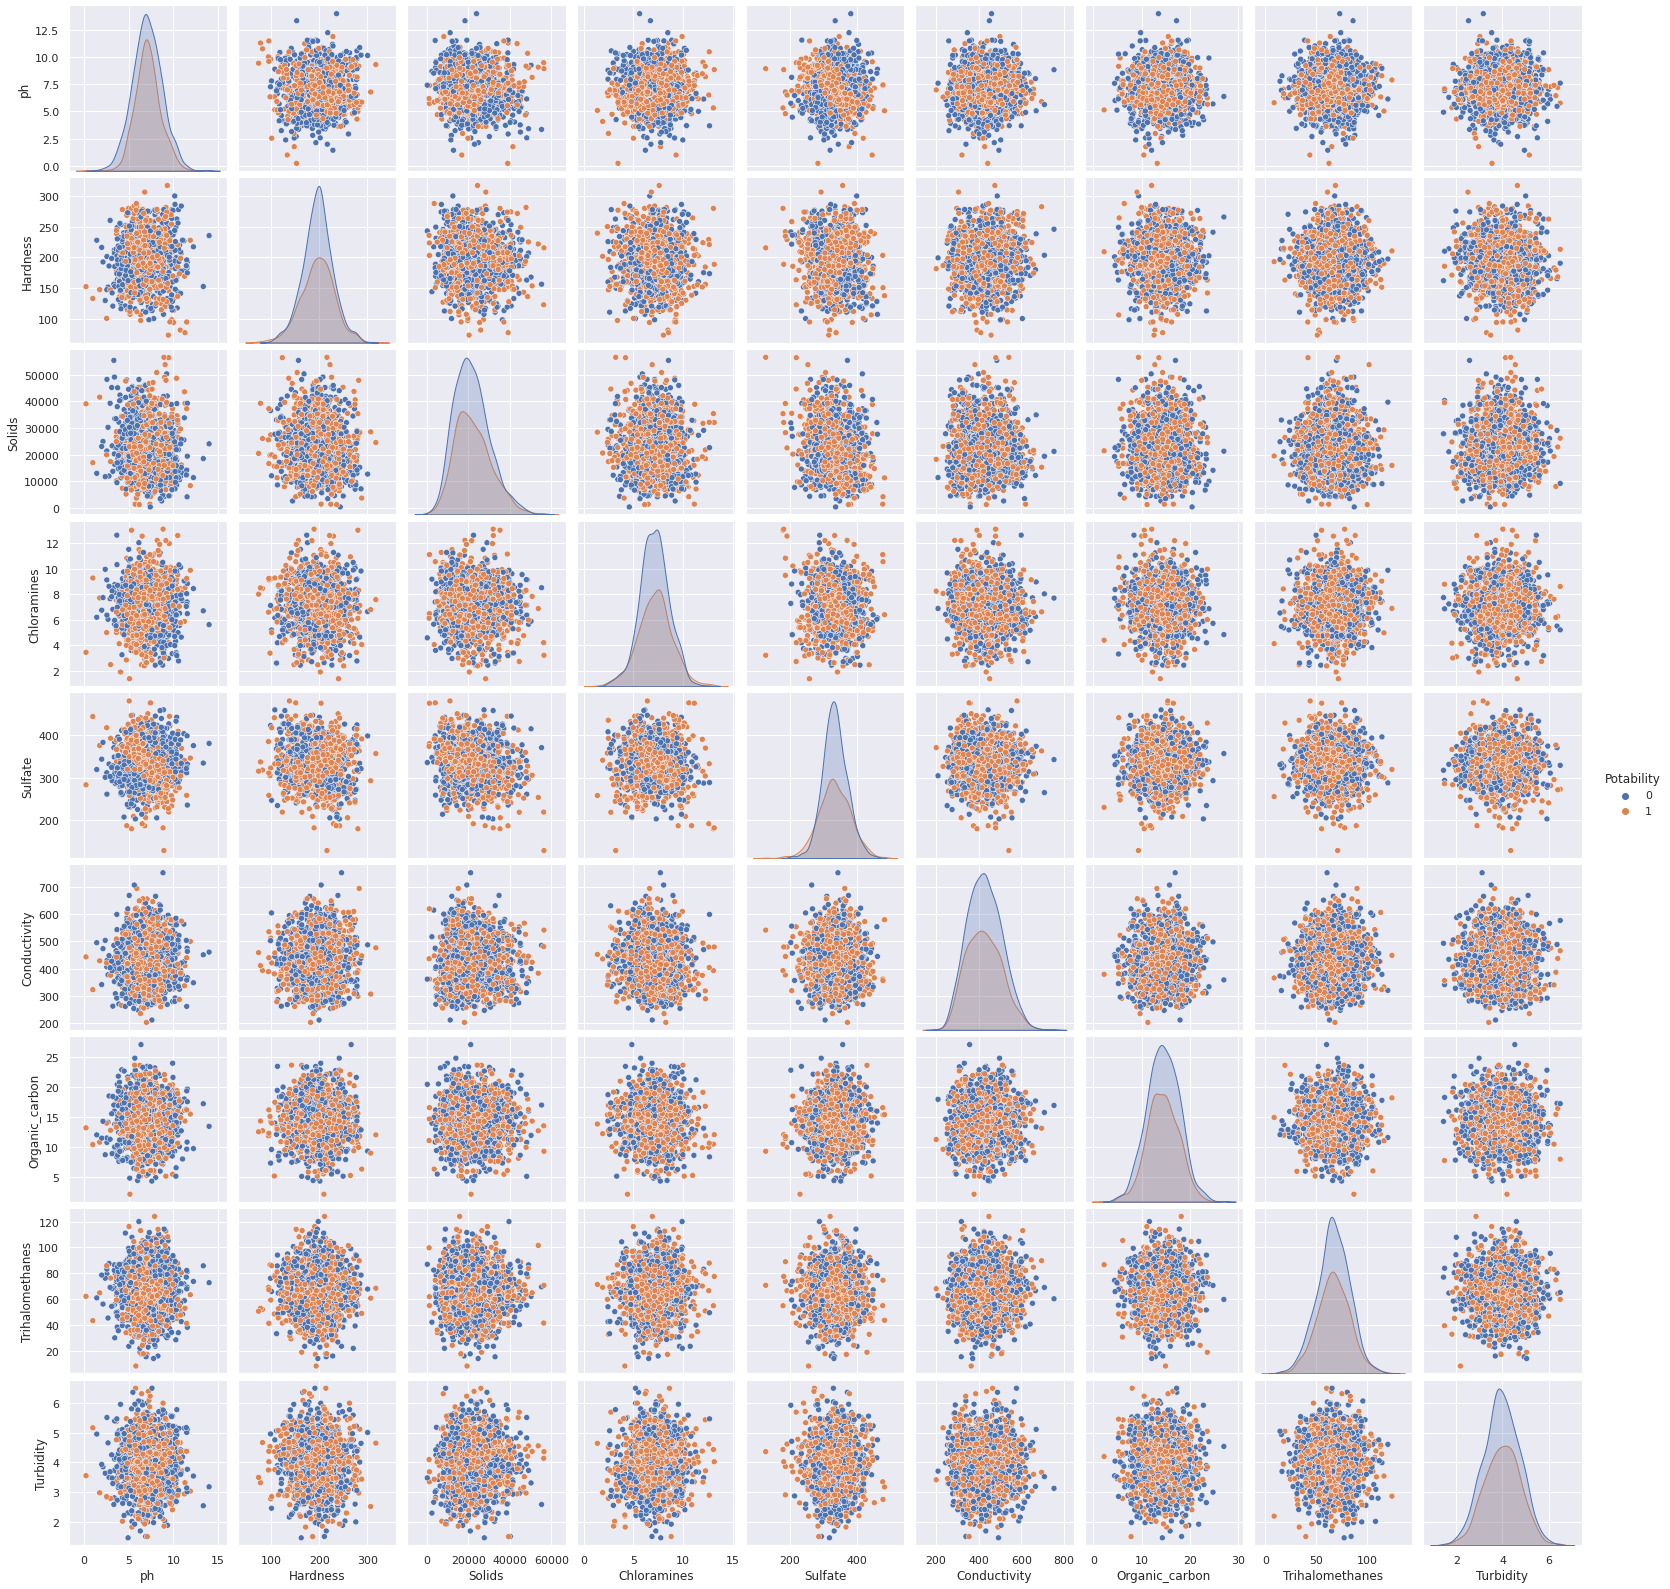

In [19]:
sns.pairplot(df, hue='Potability')
plt.show()

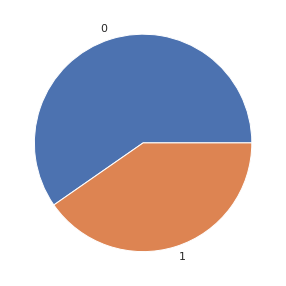

In [20]:
y =df['Potability']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [22]:
X = df.drop(columns=['Potability'])
X.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292
12,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756
15,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348
17,9.181560,273.813807,24041.326280,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661


In [23]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,7.085990,1.573337,0.227499,6.089723,7.027297,8.052969,14.000000
Hardness,2011.0,195.968072,32.635085,73.492234,176.744938,197.191839,216.441070,317.338124
Solids,2011.0,21917.441374,8642.239815,320.942611,15615.665390,20933.512750,27182.587067,56488.672413
Chloramines,2011.0,7.134338,1.584820,1.390871,6.138895,7.143907,8.109726,13.127000
Sulfate,2011.0,333.224672,41.205172,129.000000,307.632511,332.232177,359.330555,481.030642
Conductivity,2011.0,426.526409,80.712572,201.619737,366.680307,423.455906,482.373169,753.342620
Organic_carbon,2011.0,14.357709,3.324959,2.200000,12.124105,14.322019,16.683049,27.006707
Trihalomethanes,2011.0,66.400859,16.077109,8.577013,55.952664,66.542198,77.291925,124.000000
Turbidity,2011.0,3.969729,0.780346,1.450000,3.442915,3.968177,4.514175,6.494749


**Standardize the Data**

In [24]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761
1,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.348429,-0.842154,-2.140399,0.135033
2,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.810063,-1.792340,-0.714423,-1.807366
3,1.994902,1.596951,0.790764,0.239248,1.467140,-1.770608,-0.170876,1.132494,-1.662163
4,0.985323,0.226606,-0.954313,-1.622878,-0.726179,0.595858,-0.599824,-0.224135,0.553348
5,2.602948,0.958207,0.412851,1.226224,1.719070,1.702253,1.073994,0.346899,0.513788
6,0.174609,-0.933193,1.219336,0.262784,-0.160222,-0.014165,0.369751,0.767689,-0.394073
7,0.021510,-1.203393,-0.368819,-2.226865,-1.235119,-0.976688,0.472853,0.815021,-0.671629
8,-0.469640,-0.283054,2.216156,1.574866,0.758905,1.118033,-0.847719,0.539457,0.521205
9,1.332259,2.385932,0.245817,-0.144752,1.580919,0.637584,-0.291916,0.314594,0.684395


In [25]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,-2.119968e-16,1.000249,-4.360285,-0.633376,-0.037314,0.614757,4.395582
Hardness,2011.0,4.504933e-17,1.000249,-3.753822,-0.589179,0.037508,0.627487,3.719930
Solids,2011.0,6.978229e-17,1.000249,-2.499568,-0.729365,-0.113879,0.609385,4.001258
Chloramines,2011.0,-7.066561e-17,1.000249,-3.624952,-0.628267,0.006039,0.615610,3.782229
Sulfate,2011.0,1.943304e-16,1.000249,-4.957520,-0.621245,-0.024093,0.633716,3.587965
Conductivity,2011.0,7.720218e-16,1.000249,-2.787207,-0.741656,-0.038052,0.692094,4.050143
Organic_carbon,2011.0,4.169271e-16,1.000249,-3.657409,-0.671936,-0.010737,0.699533,3.805203
Trihalomethanes,2011.0,-7.278558e-16,1.000249,-3.597551,-0.650042,0.008793,0.677595,3.583571
Turbidity,2011.0,-3.427282e-16,1.000249,-3.229792,-0.675270,-0.001989,0.697872,3.236574


**Observations and variables**

In [26]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

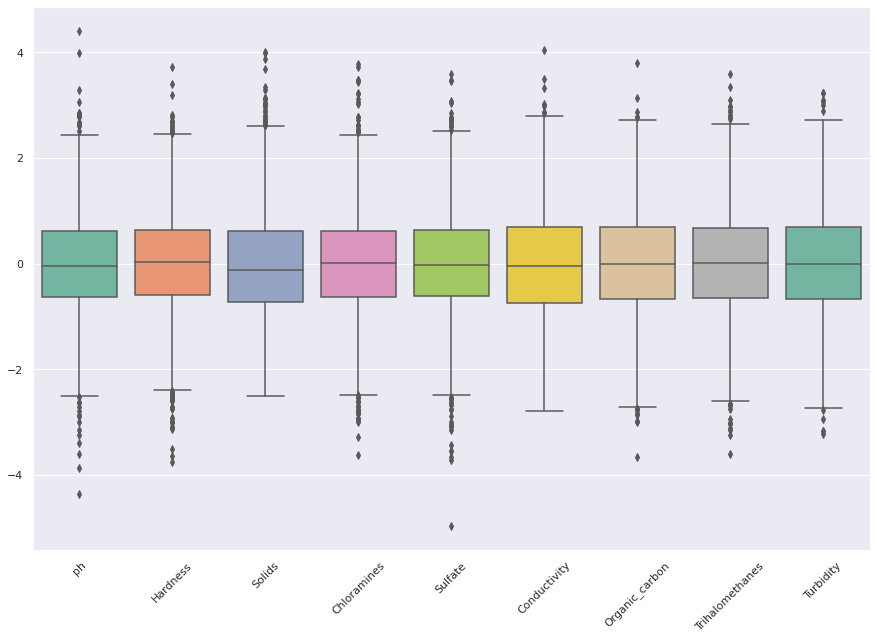

In [27]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


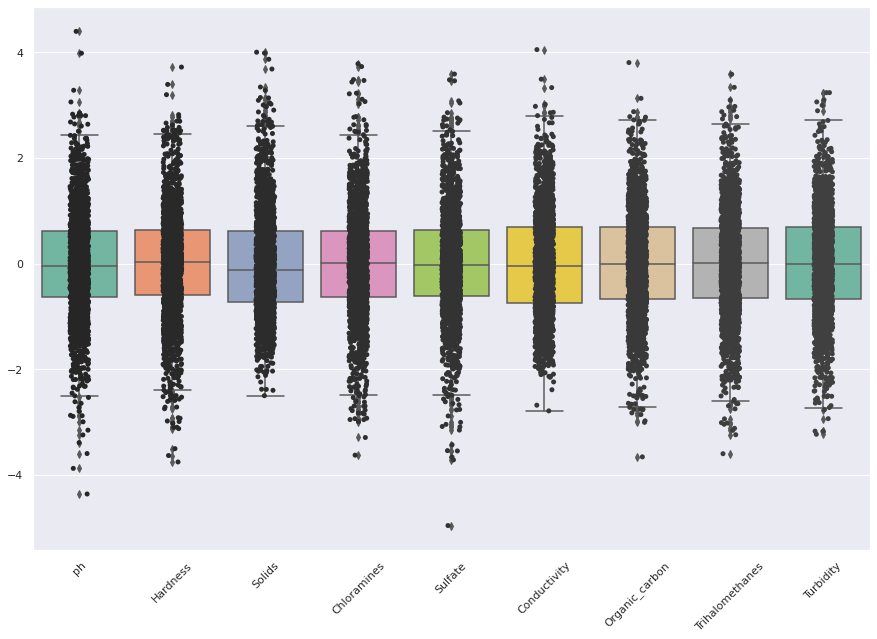

In [28]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

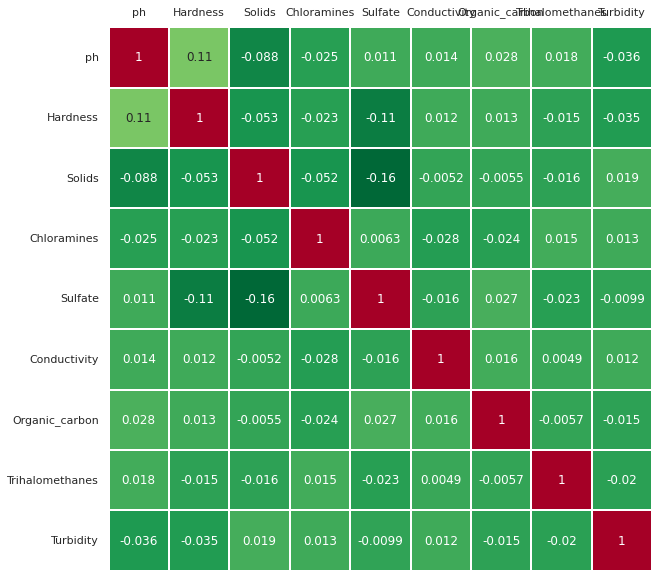

In [29]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, 'Z2')

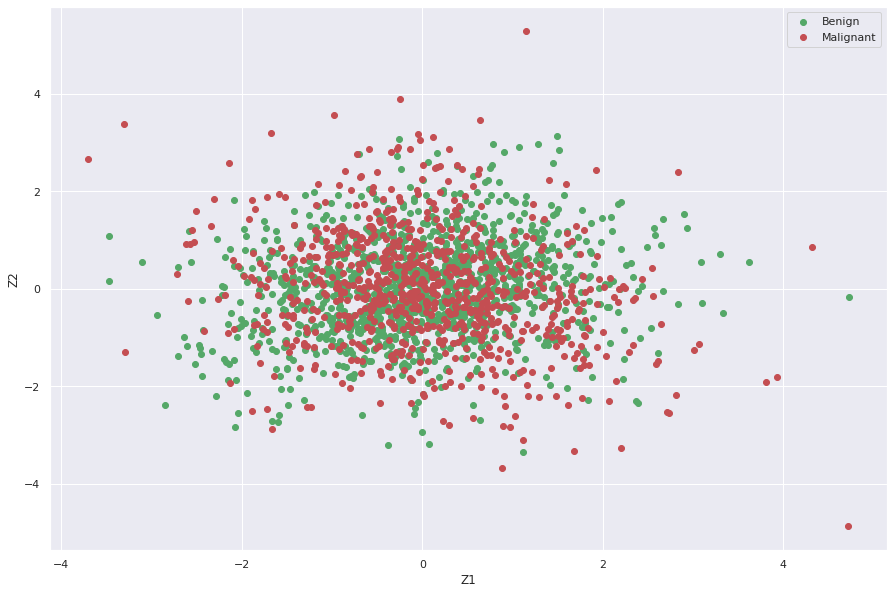

In [31]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

array([[-0.47404071, -0.38863879, -0.02855533,  0.06350484, -0.0458843 ,
         0.02559969, -0.26977197,  0.73741317,  0.00901164],
       [-0.21606914, -0.62587007, -0.17244337,  0.28462248,  0.07133336,
        -0.07436301,  0.02846038, -0.47688068, -0.46044611],
       [ 0.66225649, -0.16821895,  0.11815196, -0.15566146,  0.12673165,
        -0.05769798,  0.0030525 ,  0.37314318, -0.57990796],
       [-0.06779952,  0.2597866 , -0.59443501,  0.17142755, -0.1188623 ,
        -0.50058809,  0.45328296,  0.2331144 , -0.14369872],
       [-0.45863379,  0.54146414,  0.2424053 , -0.03075806,  0.04773887,
         0.15568366, -0.05988011, -0.01397518, -0.63754835],
       [-0.01664511, -0.16084655,  0.37054766,  0.03163354, -0.7479588 ,
         0.15423477,  0.49747192,  0.04687941, -0.05136489],
       [-0.16382524, -0.08868279,  0.51549467, -0.25103235,  0.10830838,
        -0.78419574,  0.01743162, -0.07095278,  0.06717762],
       [-0.04620069, -0.04434396, -0.36757885, -0.69650358, -0

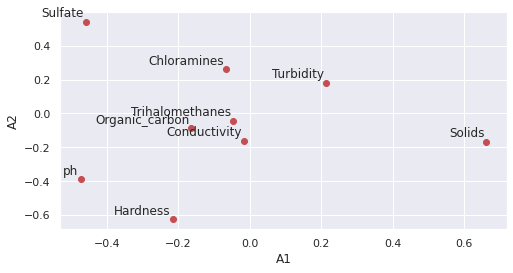

In [33]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


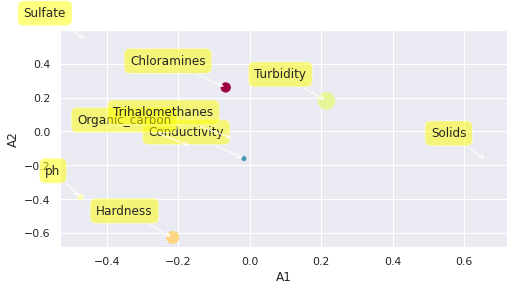

In [35]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

array([1.20757355, 1.17106004, 1.04643829, 1.01106139, 1.00553877,
       0.97103026, 0.95196501, 0.87394765, 0.76586266])

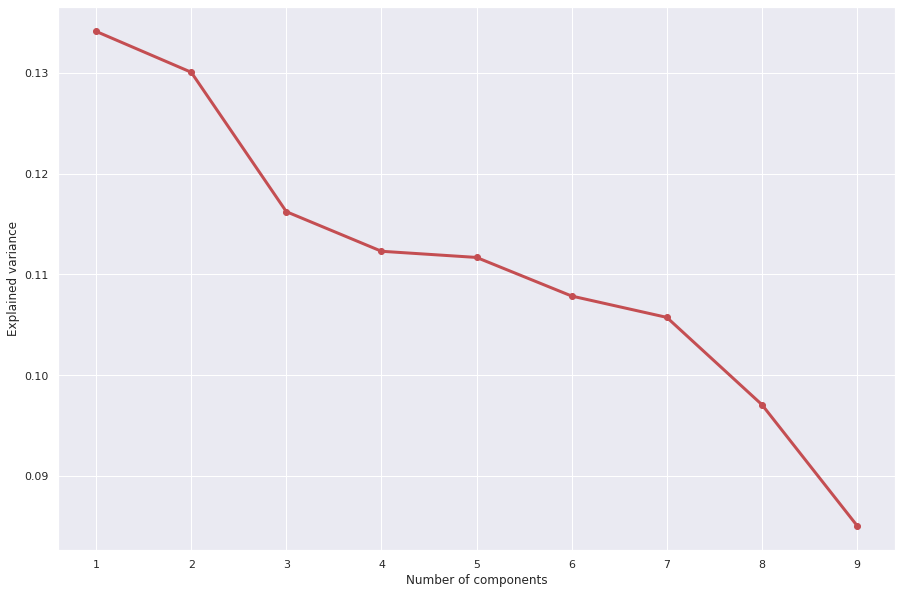

In [36]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

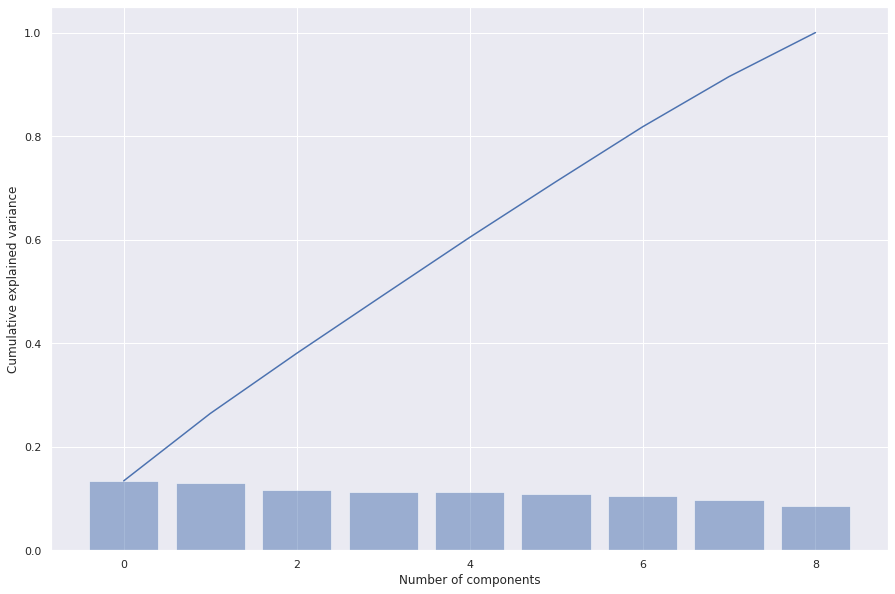

In [37]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Bi plot**

array([-0.12034861, -0.28366897,  0.52176466, ...,  0.013148  ,
        0.6414265 ,  0.41842428])

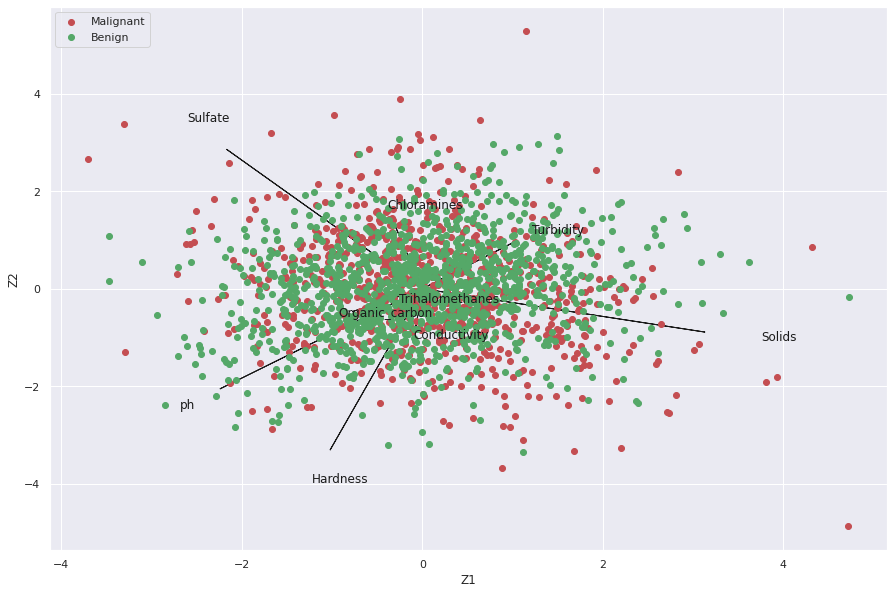

In [39]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

## **Using PCA Library**

In [40]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=1b2048b579cf99508efb190f64f667f5485102347aa866b412325353ec022104
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
